In [ ]:
import numpy as np
import os
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D


Load train and test files


In [ ]:
files_train = 0
files_validation = 0
cwd = os.getcwd()
folder='/content/drive/MyDrive/train_data/train'

for sub_folder in os.listdir(folder):
    path = os.path.join(folder, sub_folder)
    if os.path.isdir(path):
        files_train += len(os.listdir(path))

folder ='/content/drive/MyDrive/train_data/test'
for sub_folder in os.listdir(folder):
    path = os.path.join(folder, sub_folder)
    if os.path.isdir(path):
        files_validation += len(os.listdir(path))

print(files_train,files_validation)

432 164


Set Key Parameters


In [ ]:
img_width , img_height = 48,48
train_data_dir = '/content/drive/MyDrive/train_data/train'
validation_data_dir= '/content/drive/MyDrive/train_data/test'
nb_train_sample = files_train
nb_validation_sample = files_validation
batch_size = 32
epochs = 10
num_classes = 2

**BUILD MODEL ON TOP OF VGG(PRETRAINED)**

In [ ]:
model = applications.VGG16(weights = 'imagenet', include_top=False, input_shape = (img_width, img_height, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 48, 48, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 48, 48, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 48, 48, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.layers

[<InputLayer name=input_layer, built=True>,
 <Conv2D name=block1_conv1, built=True>,
 <Conv2D name=block1_conv2, built=True>,
 <MaxPooling2D name=block1_pool, built=True>,
 <Conv2D name=block2_conv1, built=True>,
 <Conv2D name=block2_conv2, built=True>,
 <MaxPooling2D name=block2_pool, built=True>,
 <Conv2D name=block3_conv1, built=True>,
 <Conv2D name=block3_conv2, built=True>,
 <Conv2D name=block3_conv3, built=True>,
 <MaxPooling2D name=block3_pool, built=True>,
 <Conv2D name=block4_conv1, built=True>,
 <Conv2D name=block4_conv2, built=True>,
 <Conv2D name=block4_conv3, built=True>,
 <MaxPooling2D name=block4_pool, built=True>,
 <Conv2D name=block5_conv1, built=True>,
 <Conv2D name=block5_conv2, built=True>,
 <Conv2D name=block5_conv3, built=True>,
 <MaxPooling2D name=block5_pool, built=True>]

In [ ]:
for layer in model.layers[:10]:
  layer.trainable = False

In [ ]:
x = model.output
x = Flatten()(x)

predictions = Dense(num_classes,activation='softmax')(x)
model_final = Model(inputs=model.input,outputs=predictions)

model_final.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.SGD(learning_rate=0.0001, momentum=0.9),
    metrics=['accuracy']
)

**Data Augmentation**

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1.0/255, horizontal_flip=True,
                   fill_mode = 'nearest', zoom_range = 0.1,
                   width_shift_range=0.1, height_shift_range=0.2,
                   rotation_range = 5)
test_datagen = ImageDataGenerator(rescale = 1.0/255, horizontal_flip=True,
                   fill_mode = 'nearest', zoom_range = 0.1,
                   width_shift_range=0.1, height_shift_range=0.2,
                   rotation_range = 5)

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size = (img_height,img_width),
                                  batch_size = batch_size,
                                  class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory(validation_data_dir, target_size = (img_height,img_width),
                                  batch_size = batch_size,
                                  class_mode = 'categorical')

Found 432 images belonging to 2 classes.
Found 164 images belonging to 2 classes.


In [ ]:
history = model_final.fit(
    train_generator,
    steps_per_epoch=nb_train_sample // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_sample // batch_size
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 110s 7s/step - accuracy: 0.5089 - loss: 0.6732 - val_accuracy: 0.7625 - val_loss: 0.4670
Epoch 2/10
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8750 - loss: 0.3223

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 267ms/step - accuracy: 0.8750 - loss: 0.3223 - val_accuracy: 1.0000 - val_loss: 0.0611
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 33s 131ms/step - accuracy: 0.7769 - loss: 0.3741 - val_accuracy: 0.8813 - val_loss: 0.3132
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9375 - loss: 0.2490 - val_accuracy: 0.7500 - val_loss: 0.6746
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - accuracy: 0.9447 - loss: 0.2604 - val_accuracy: 0.9125 - val_loss: 0.3110
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9688 - loss: 0.1585 - val_accuracy: 1.0000 - val_loss: 0.0262
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 158ms/step - accuracy: 0.9254 - loss: 0.2006 - val_accuracy: 0.9000 - val_loss: 0.2906
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9375 - loss: 0.2335 - val_accuracy: 1.0000 - val_loss: 0.0149
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.9497 - loss: 0.1486 - val_accuracy: 0.9187 - val_lo

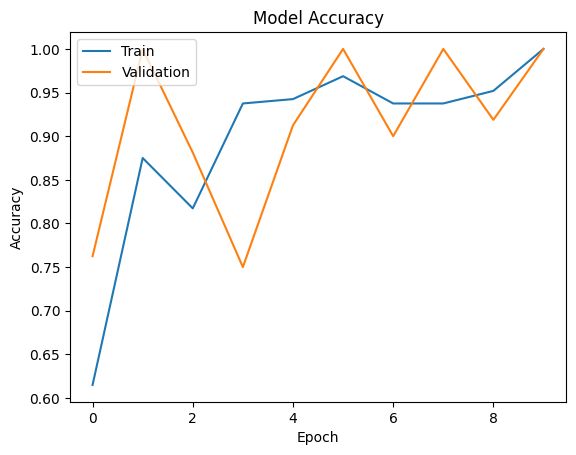

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


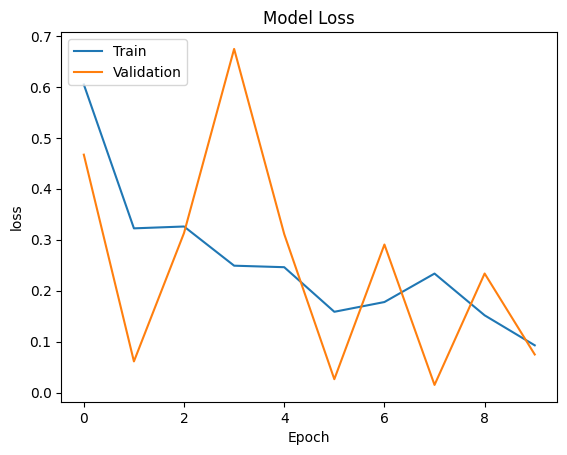

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
model_final.save('model_final.h5')

In [ ]:
class_dictionary = {}
class_dictionary[0] = 'no_car'
class_dictionary[1] = 'car'
class_dictionary

{0: 'no_car', 1: 'car'}

**Predictive System**

In [ ]:
import cv2
import numpy as np

def make_prediction(image_path):
    image = cv2.imread(image_path)

    image = cv2.resize(image, (48, 48))

    image = image / 255.0

    image = np.expand_dims(image, axis=0)

    class_predictor = model_final.predict(image)

    intId = np.argmax(class_predictor)

    label = class_dictionary[intId]

    return label




In [ ]:
result = make_prediction("/content/drive/MyDrive/train_data/test/empty/spot162.jpg")
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
no_car


In [ ]:
result = make_prediction("/content/drive/MyDrive/train_data/test/occupied/spot129.jpg")
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
car


In [ ]:
model_final.save("model_final.h5")